In [ ]:
# 导入必要的库
import torch  # PyTorch深度学习框架
import torchvision  # PyTorch的计算机视觉库，包含常用数据集、模型和数据增强等
import numpy as np  # 用于数值计算的库
import matplotlib.pyplot as plt  # 用于绘图的库
from torchvision import datasets, transforms  # 导入数据集和数据转换工具




使用设备: cpu
轮次 1/20 完成! 训练损失: 0.8704, 训练准确率: 68.38%, 验证损失: 0.5056, 验证准确率: 81.44%
轮次 2/20 完成! 训练损失: 0.4772, 训练准确率: 82.81%, 验证损失: 0.4187, 验证准确率: 84.72%
轮次 3/20 完成! 训练损失: 0.4188, 训练准确率: 84.89%, 验证损失: 0.4133, 验证准确率: 84.44%
轮次 4/20 完成! 训练损失: 0.3838, 训练准确率: 86.06%, 验证损失: 0.4187, 验证准确率: 83.40%
轮次 5/20 完成! 训练损失: 0.3642, 训练准确率: 86.80%, 验证损失: 0.3713, 验证准确率: 86.04%
轮次 6/20 完成! 训练损失: 0.3486, 训练准确率: 87.45%, 验证损失: 0.4234, 验证准确率: 84.82%
轮次 7/20 完成! 训练损失: 0.3354, 训练准确率: 87.74%, 验证损失: 0.3623, 验证准确率: 86.42%
轮次 8/20 完成! 训练损失: 0.3218, 训练准确率: 88.29%, 验证损失: 0.3362, 验证准确率: 87.58%
轮次 9/20 完成! 训练损失: 0.3123, 训练准确率: 88.48%, 验证损失: 0.3400, 验证准确率: 87.34%
轮次 10/20 完成! 训练损失: 0.3020, 训练准确率: 88.93%, 验证损失: 0.3302, 验证准确率: 87.62%
轮次 11/20 完成! 训练损失: 0.2943, 训练准确率: 89.13%, 验证损失: 0.3714, 验证准确率: 86.58%
轮次 12/20 完成! 训练损失: 0.2871, 训练准确率: 89.33%, 验证损失: 0.3257, 验证准确率: 87.84%
轮次 13/20 完成! 训练损失: 0.2810, 训练准确率: 89.59%, 验证损失: 0.3333, 验证准确率: 87.46%
轮次 14/20 完成! 训练损失: 0.2727, 训练准确率: 89.97%, 验证损失: 0.3182, 验证准确率: 88.44%
轮次 15/20 完成! 训练损失: 

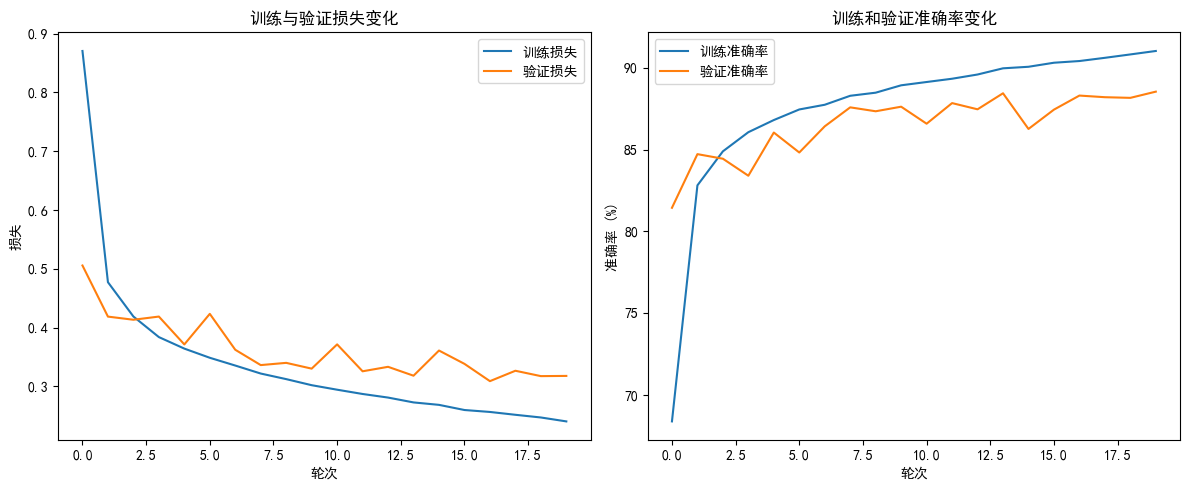

In [ ]:

# 定义数据预处理转换
transform = transforms.Compose([
    transforms.ToTensor()  # 将图片转换为张量，并自动将像素值归一化到[0,1]范围
])

# 加载Fashion-MNIST数据集
train_dataset = datasets.FashionMNIST(
    root='./data',       # 数据集保存路径
    train=True,          # 加载训练集
    download=True,       # 如果数据不存在则下载
    transform=transform  # 应用数据转换
)

test_dataset = datasets.FashionMNIST(
    root='./data',       # 数据集保存路径
    train=False,         # 加载测试集
    download=True,       # 如果数据不存在则下载
    transform=transform  # 应用数据转换
)


# 将PyTorch张量转换为NumPy数组以便进行预处理
train_images = train_dataset.data.numpy()  # 训练图像数据转换为NumPy数组
train_labels = train_dataset.targets.numpy()  # 训练标签转换为NumPy数组
test_images = test_dataset.data.numpy()  # 测试图像数据转换为NumPy数组
test_labels = test_dataset.targets.numpy()  # 测试标签转换为NumPy数组


# 定义Fashion-MNIST数据集的10个类别名称
class_names = [
    'T-shirt/top',  # 0: T恤/上衣
    '裤子',         # 1: 裤子
    '套头衫',       # 2: 套头衫
    '连衣裙',       # 3: 连衣裙
    '外套',         # 4: 外套
    '凉鞋',         # 5: 凉鞋
    '衬衫',         # 6: 衬衫
    '运动鞋',       # 7: 运动鞋
    '包',           # 8: 包
    '短靴'          # 9: 短靴
]


train_labels[0:20]

# 使用MinMaxScaler对图像数据进行归一化处理
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # 创建MinMaxScaler实例，将数据缩放到[0,1]范围

# 对训练图像进行归一化
# 1. reshape(-1, train_images.shape[-1]): 将图像展平为2D数组
# 2. fit_transform: 计算缩放参数并应用
# 3. reshape(train_images.shape): 恢复原始形状
train_images = scaler.fit_transform(train_images.reshape(-1, train_images.shape[-1])).reshape(train_images.shape)

# 对测试图像进行归一化
# 使用在训练集上计算的缩放参数
test_images = scaler.transform(test_images.reshape(-1, test_images.shape[-1])).reshape(test_images.shape)


# 划分训练集和验证集
train_size = 55000  # 训练集样本数量
val_size = 5000     # 验证集样本数量

# 使用PyTorch的random_split函数将原始训练集划分为训练集和验证集
from torch.utils.data import Dataset
train_dataset, val_dataset = torch.utils.data.random_split(
    train_dataset,           # 要划分的数据集
    [train_size, val_size]   # 每个子集的大小
)

# 创建数据加载器(DataLoader)
# DataLoader用于批量加载数据，支持随机打乱、多进程加载等功能

# 训练集的DataLoader
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,  # 数据集
    batch_size=64,         # 每批处理的样本数
    shuffle=True           # 随机打乱数据
)

# 验证集的DataLoader
val_loader = torch.utils.data.DataLoader(
    dataset=val_dataset,   # 数据集
    batch_size=64,         # 每批处理的样本数
    shuffle=False          # 验证集不需要打乱数据
)



# 导入PyTorch神经网络相关模块
import torch.nn as nn                # 包含神经网络层的基类和常用层的实现
import torch.nn.functional as F      # 包含激活函数和其他函数操作
import torch.optim as optim         # 包含各种优化器的实现

# 定义Fashion-MNIST分类网络
class FashionMNISTNet(nn.Module):
    """
    一个用于Fashion-MNIST图像分类的全连接神经网络
    网络结构：输入层(784) -> 全连接层(512) -> 全连接层(256) -> 全连接层(128) -> 输出层(10)
    每个隐藏层后都使用ReLU激活函数和Dropout正则化
    """
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        # 定义网络层
        self.fc1 = nn.Linear(28*28, 512)    # 第一个全连接层：输入784(28x28像素)，输出512个神经元
        self.fc2 = nn.Linear(512, 256)      # 第二个全连接层：输入512，输出256个神经元
        self.fc3 = nn.Linear(256, 128)      # 第三个全连接层：输入256，输出128个神经元
        self.fc4 = nn.Linear(128, 10)       # 输出层：输入128，输出10个类别
        self.dropout = nn.Dropout(0.2)      # Dropout层：随机丢弃20%的神经元，防止过拟合
        
    def forward(self, x):
        """
        前向传播函数
        参数:
            x: 输入图像张量，形状为(batch_size, 1, 28, 28)
        返回:
            x: 输出预测张量，形状为(batch_size, 10)
        """
        x = x.view(-1, 28*28)              # 将输入图像展平：(batch_size, 1, 28, 28) -> (batch_size, 784)
        
        # 第一层：全连接 -> ReLU激活 -> Dropout
        x = F.relu(self.fc1(x))            # 线性变换后应用ReLU激活函数
        x = self.dropout(x)                # 应用dropout防止过拟合
        
        # 第二层：全连接 -> ReLU激活 -> Dropout
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # 第三层：全连接 -> ReLU激活 -> Dropout
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        
        # 输出层：全连接（不使用激活函数，因为后面会用交叉熵损失）
        x = self.fc4(x)
        return x

# 创建模型实例
model = FashionMNISTNet()

# 检测并设置计算设备（GPU/CPU）
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 将模型移动到指定设备（GPU/CPU）
model = model.to(device)

# 定义训练所需的损失函数和优化器
criterion = nn.CrossEntropyLoss()                                    # 交叉熵损失函数，适用于多分类问题
optimizer = optim.SGD(model.parameters(),                           # 随机梯度下降优化器
                     lr=0.01,                                       # 学习率
                     momentum=0.9)                                  # 动量因子，帮助优化器跳出局部最小值


def evaluate_model(model, data_loader, device):
    """
    评估模型在给定数据集上的准确率
    
    参数:
        model: 需要评估的模型
        data_loader: 数据加载器
        device: 计算设备(CPU/GPU)
    
    返回:
        accuracy: 模型准确率
    """
    model.eval()  # 设置为评估模式
    correct = 0
    total = 0
    
    with torch.no_grad():  # 不计算梯度
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1) #torch.max(outputs.data, 1)返回两个值，第一个是最大值，第二个是最大值的索引
            total += labels.size(0) #labels.size(0)返回标签的维度，这里返回的是batch_size，因为每个批次有batch_size个标签
            correct += (predicted == labels).sum().item() #(predicted == labels).sum().item()返回预测正确的标签的个数
    
    accuracy = 100 * correct / total #计算准确率
    print(f"测试集准确率: {accuracy:.2f}%")
    return accuracy

def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=20):
    """
    训练模型函数
    
    参数:
        model: 要训练的模型
        train_loader: 训练数据加载器
        val_loader: 验证数据加载器
        criterion: 损失函数
        optimizer: 优化器
        device: 计算设备(CPU/GPU)
        num_epochs: 训练轮数
        
    返回:
        model: 训练好的模型
        history: 训练历史数据，包含每轮的损失和准确率
    """
    # 记录训练历史
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    # 训练循环
    for epoch in range(num_epochs):
        model.train()  # 设置为训练模式
        running_loss = 0.0
        correct = 0
        total = 0
        
        # 训练一个epoch,把55000全部训练一遍
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            # 梯度清零
            optimizer.zero_grad()
            
            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # 反向传播与优化
            loss.backward() #反向传播，计算梯度
            optimizer.step() #优化器更新参数
            
            # 统计损失和准确率
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # 每100个批次打印一次信息
            if (i + 1) % 100 == 0:
                print(f'轮次 [{epoch+1}/{num_epochs}], 批次 [{i+1}/{len(train_loader)}], 损失: {loss.item():.4f}', end='\r')
        
        # 计算当前epoch的平均损失和准确率
        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_acc = 100 * correct / total
        
        # 评估验证集
        model.eval()  # 设置为评估模式
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():  # 不计算梯度
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        epoch_val_loss = val_loss / len(val_loader)
        epoch_val_acc = 100 * val_correct / val_total
        
        # 记录历史数据
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_acc)
        
        print(f'轮次 {epoch+1}/{num_epochs} 完成! 训练损失: {epoch_train_loss:.4f}, 训练准确率: {epoch_train_acc:.2f}%, 验证损失: {epoch_val_loss:.4f}, 验证准确率: {epoch_val_acc:.2f}%')
    
    # 绘制训练历史
    plt.figure(figsize=(12, 5))
    
    # 设置中文字体
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
    
    # 绘制损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='训练损失')
    plt.plot(history['val_loss'], label='验证损失')
    plt.xlabel('轮次')
    plt.ylabel('损失')
    plt.title('训练与验证损失变化')
    plt.legend()
    
    # 绘制准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='训练准确率')
    plt.plot(history['val_acc'], label='验证准确率')
    plt.xlabel('轮次')
    plt.ylabel('准确率 (%)')
    plt.title('训练和验证准确率变化')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return model, history

# 开始训练模型
model, history = train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=20)


In [66]:
# 保存训练好的模型参数
torch.save(model.state_dict(),                  # 保存模型的参数（权重和偏置）
          'fashion_mnist_model.pth')            # 保存的文件名
print("模型已保存为 'fashion_mnist_model.pth'")

# 保存训练过程中的历史数据（损失和准确率）
import pickle
with open('fashion_mnist_history.pkl', 'wb') as f:
    pickle.dump(history,                        # 要保存的历史数据字典
               f)                               # 文件对象
print("训练历史已保存为 'fashion_mnist_history.pkl'")


模型已保存为 'fashion_mnist_model.pth'
训练历史已保存为 'fashion_mnist_history.pkl'
